In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats

%pwd

'/Users/uly/Documents/Fall21/CS291/realfinal/Con-MATSCo/colight_tf_mayank'

In [102]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2, n-1)
    return m, h, m-h, m+h

def get_best_runs(df, N=3):
    durations = np.array(df.iloc[-10:]['duration'].tolist())
    temp = np.partition(durations, N)
    top_durations = temp[:N]
    mean, var, l, r = mean_confidence_interval(top_durations)
    print('top durations: ', top_durations)
    print('mean: %f +/- %f (%f, %f)' %(mean, var, l, r))
    print()

In [103]:
memos = ["1135_reward3_Colight2_6_6_bi","1135_reward3_Colight_6_6_bi"]
test_data = None
total_data = None
for memo in memos:
    records_dir = os.path.join("summary", memo)
    for traffic_file in os.listdir(records_dir):
        if ".csv" in traffic_file:
            total_test_results = open(os.path.join(records_dir, traffic_file), 'r')
            dftest = pd.read_csv(total_test_results)
            dftest['memo'] = memo
        if ".json" in traffic_file:
            detailed_records_dir = os.path.join(records_dir, traffic_file)
            total_results = open(os.path.join(records_dir, traffic_file, "test_results.csv"), 'r')
            dftotal = pd.read_csv(total_results)
            get_best_runs(dftotal)
            dftotal['memo'] = memo
    test_data = dftest if test_data is None else pd.concat([test_data, dftest], ignore_index=True)
    total_data = dftotal if total_data is None else pd.concat([total_data, dftotal], ignore_index=True)

total_data['Episode'] = total_data['Unnamed: 0']
test_data['Episode'] = test_data['Unnamed: 0']

top durations:  [249.06047009 257.95128205 273.68910256]
mean: 260.233618 +/- 30.982006 (229.251613, 291.215624)

top durations:  [440.18846154 493.50044072 531.22988004]
mean: 488.306261 +/- 113.630487 (374.675774, 601.936748)



In [58]:
def plot(df,title,xname,yname, combine=False):
    plt.figure(figsize=(5, 5))
    sns.set(style="ticks")
    if combine:
        ax = sns.lineplot(x=xname, y=yname, data=df, palette="flare")
    else:
        ax = sns.lineplot(x=xname, y=yname, hue='memo', data=df, palette="flare")
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.axes.set_title(title,fontsize=15)
    ax.set_xlabel(xname,fontsize=10)
    ax.set_ylabel(yname,fontsize=12)
    plt.legend(fontsize='small', title_fontsize='20')

In [59]:
total_data.columns

Index(['Unnamed: 0', 'duration', 'queue_length', 'vehicle_in', 'vehicle_out',
       'memo', 'Episode'],
      dtype='object')

No handles with labels found to put in legend.


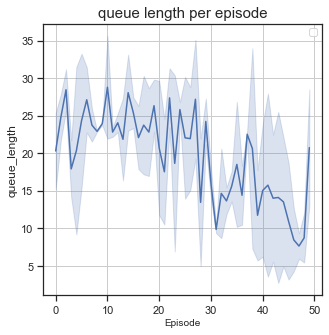

In [61]:
plot(total_data, "queue length per episode", 'Episode','queue_length', combine=True)

No handles with labels found to put in legend.


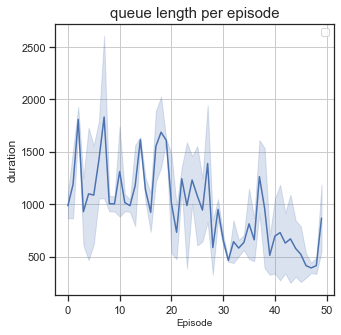

In [62]:
plot(total_data, "queue length per episode", 'Episode','duration', combine=True)